Алгоритм фильтрации Калмана был реализован в соответствии со [статьей](https://habr.com/ru/articles/166693/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [105]:
np.random.seed(0)

In [106]:
data = np.load("var1_s1_0x1_s2_5_v_2.npy")
t, z = data

In [107]:
class model:
    def __init__(self, v, x_0, dt, sigma_1, sigma_2):
        self.v = v
        self.x_0 = x_0
        self.dt = dt
        self.sigma_1 = sigma_1
        self.sigma_2 = sigma_2
        
    def get_next_point(self, x_prev):
        return x_prev + self.v*self.dt
        
    def get_next_MSE(self, MSE_prev=None):
        if MSE_prev == None:
            return sigma_2**2
        return sigma_2**2 * (MSE_prev**2 + sigma_1**2) / (MSE_prev**2 + sigma_1**2 + sigma_2**2)
    
    def get_next_K(self, MSE_prev=None):
        return self.get_next_MSE(MSE_prev=MSE_prev) / sigma_2**2
    
    def Kalman_filter(self, z_current, x_prev_opt, MSE_prev=None):
        K_current = self.get_next_K(MSE_prev)
        return K_current * z_current + (1 - K_current) * self.get_next_point(x_prev_opt)

In [108]:
v = 2
x_0 = 0
dt = t[1] - t[0]
sigma_1 = 0.1
sigma_2 = 1
mdl = model(v, x_0, dt, sigma_1, sigma_2)

In [109]:
x_opt_arr = np.ones_like(t)
x_opt_arr = x_opt_arr * x_0
MSE = None
for i in range(1, len(x_opt_arr)):
    x_opt_arr[i] = mdl.Kalman_filter(z[i], x_opt_arr[i-1], MSE_prev=MSE)
    MSE = mdl.get_next_MSE(MSE)

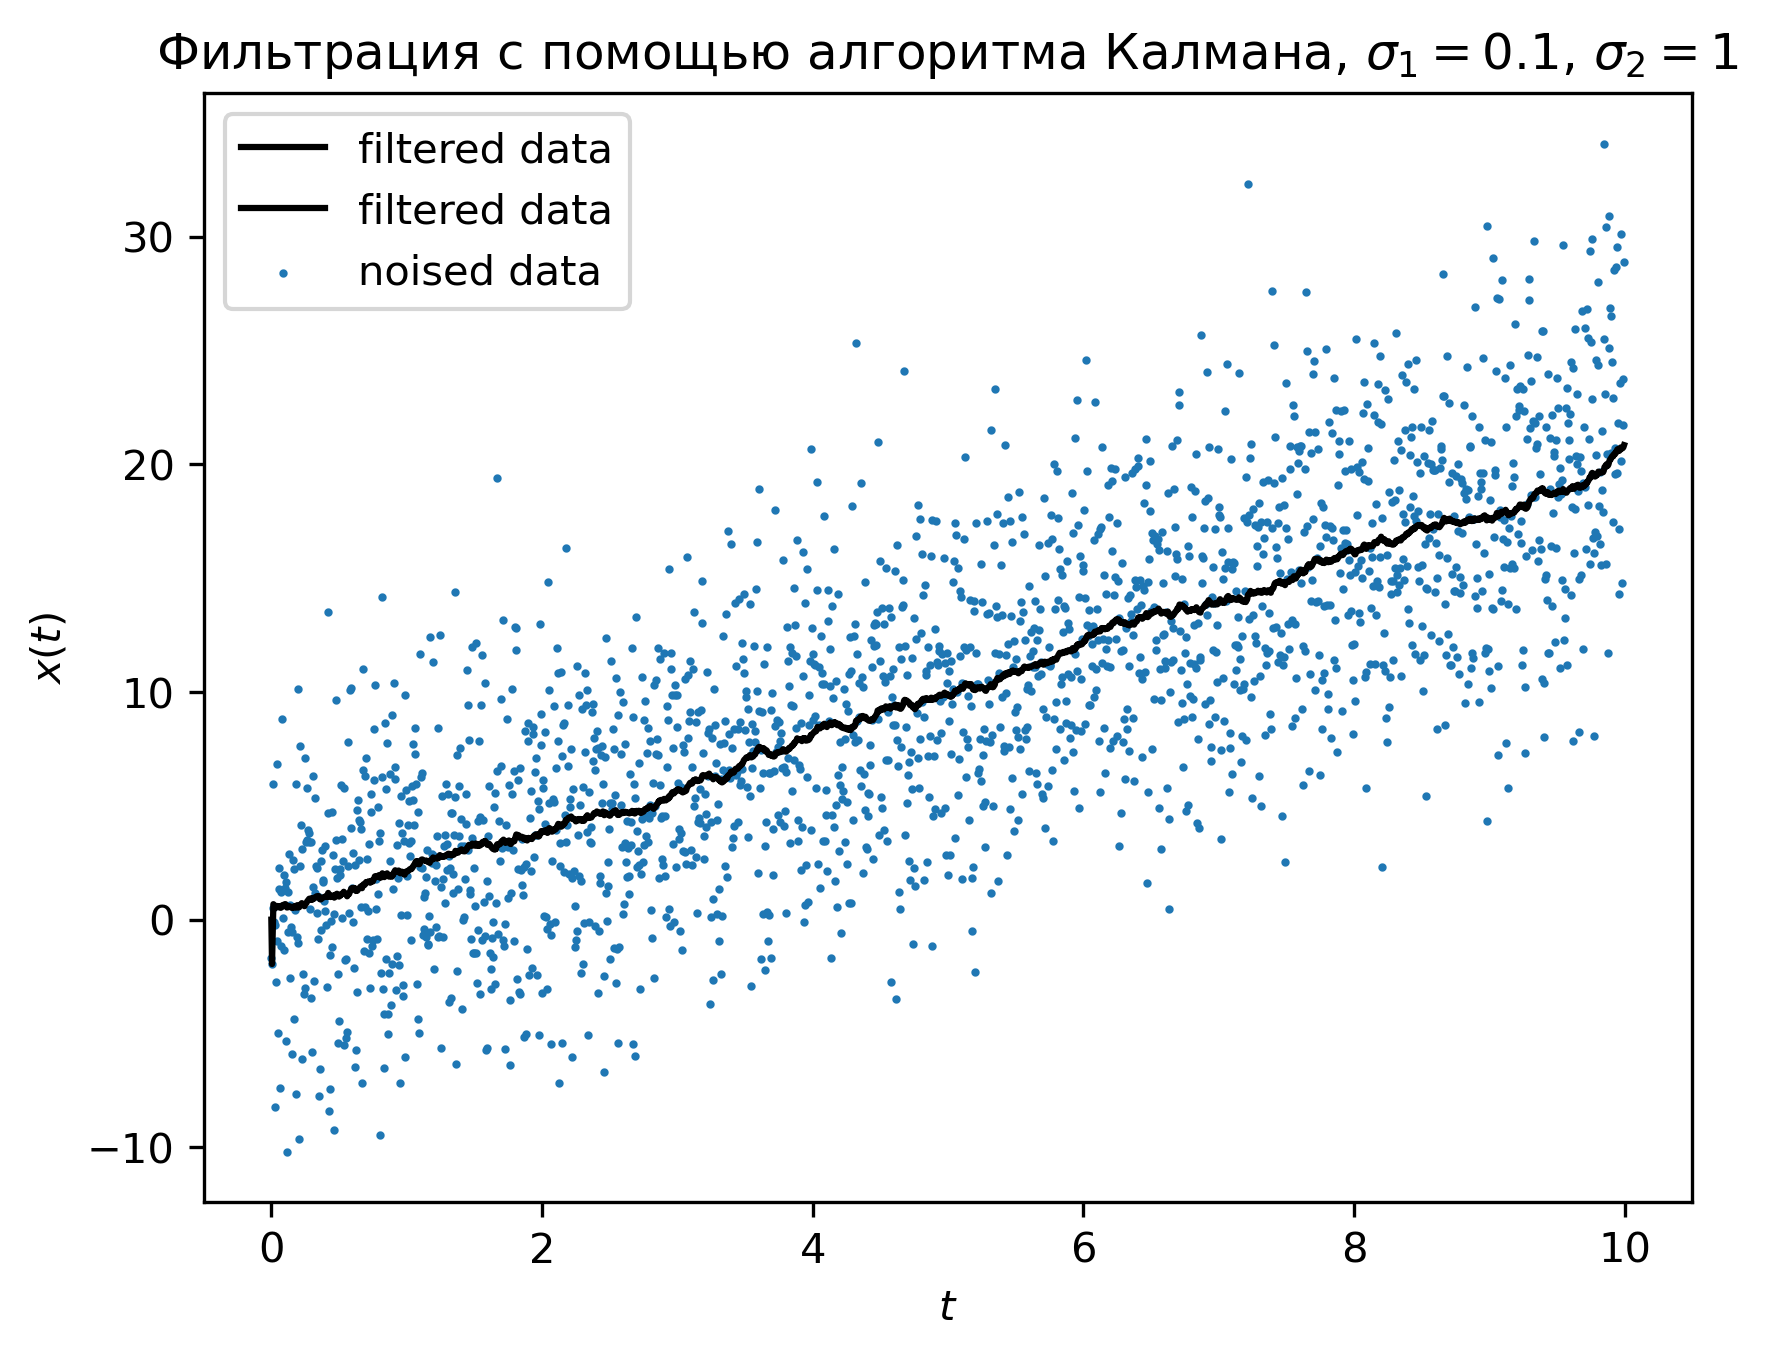

In [110]:
plt.figure(dpi=300)
plt.plot(t, x_opt_arr, 1, color='black', label=r'filtered data')
plt.scatter(t, z, 1, label=r'noised data')
plt.legend()
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.title(fr'Фильтрация с помощью алгоритма Калмана, $\sigma_1 = {sigma_1}$, $\sigma_2 = {sigma_2}$')
plt.show()

In [121]:
p = 0.1
z_with_outliers = z + np.array([int(np.random.rand() > 1 - p)*np.random.random()*25 for i in range(len(z))])

In [122]:
x_opt_arr_outliers = np.ones_like(t)
x_opt_arr_outliers = x_opt_arr * x_0
MSE = None
for i in range(1, len(x_opt_arr)):
    x_opt_arr_outliers[i] = mdl.Kalman_filter(z_with_outliers[i], x_opt_arr_outliers[i-1], MSE_prev=MSE)
    MSE = mdl.get_next_MSE(MSE)

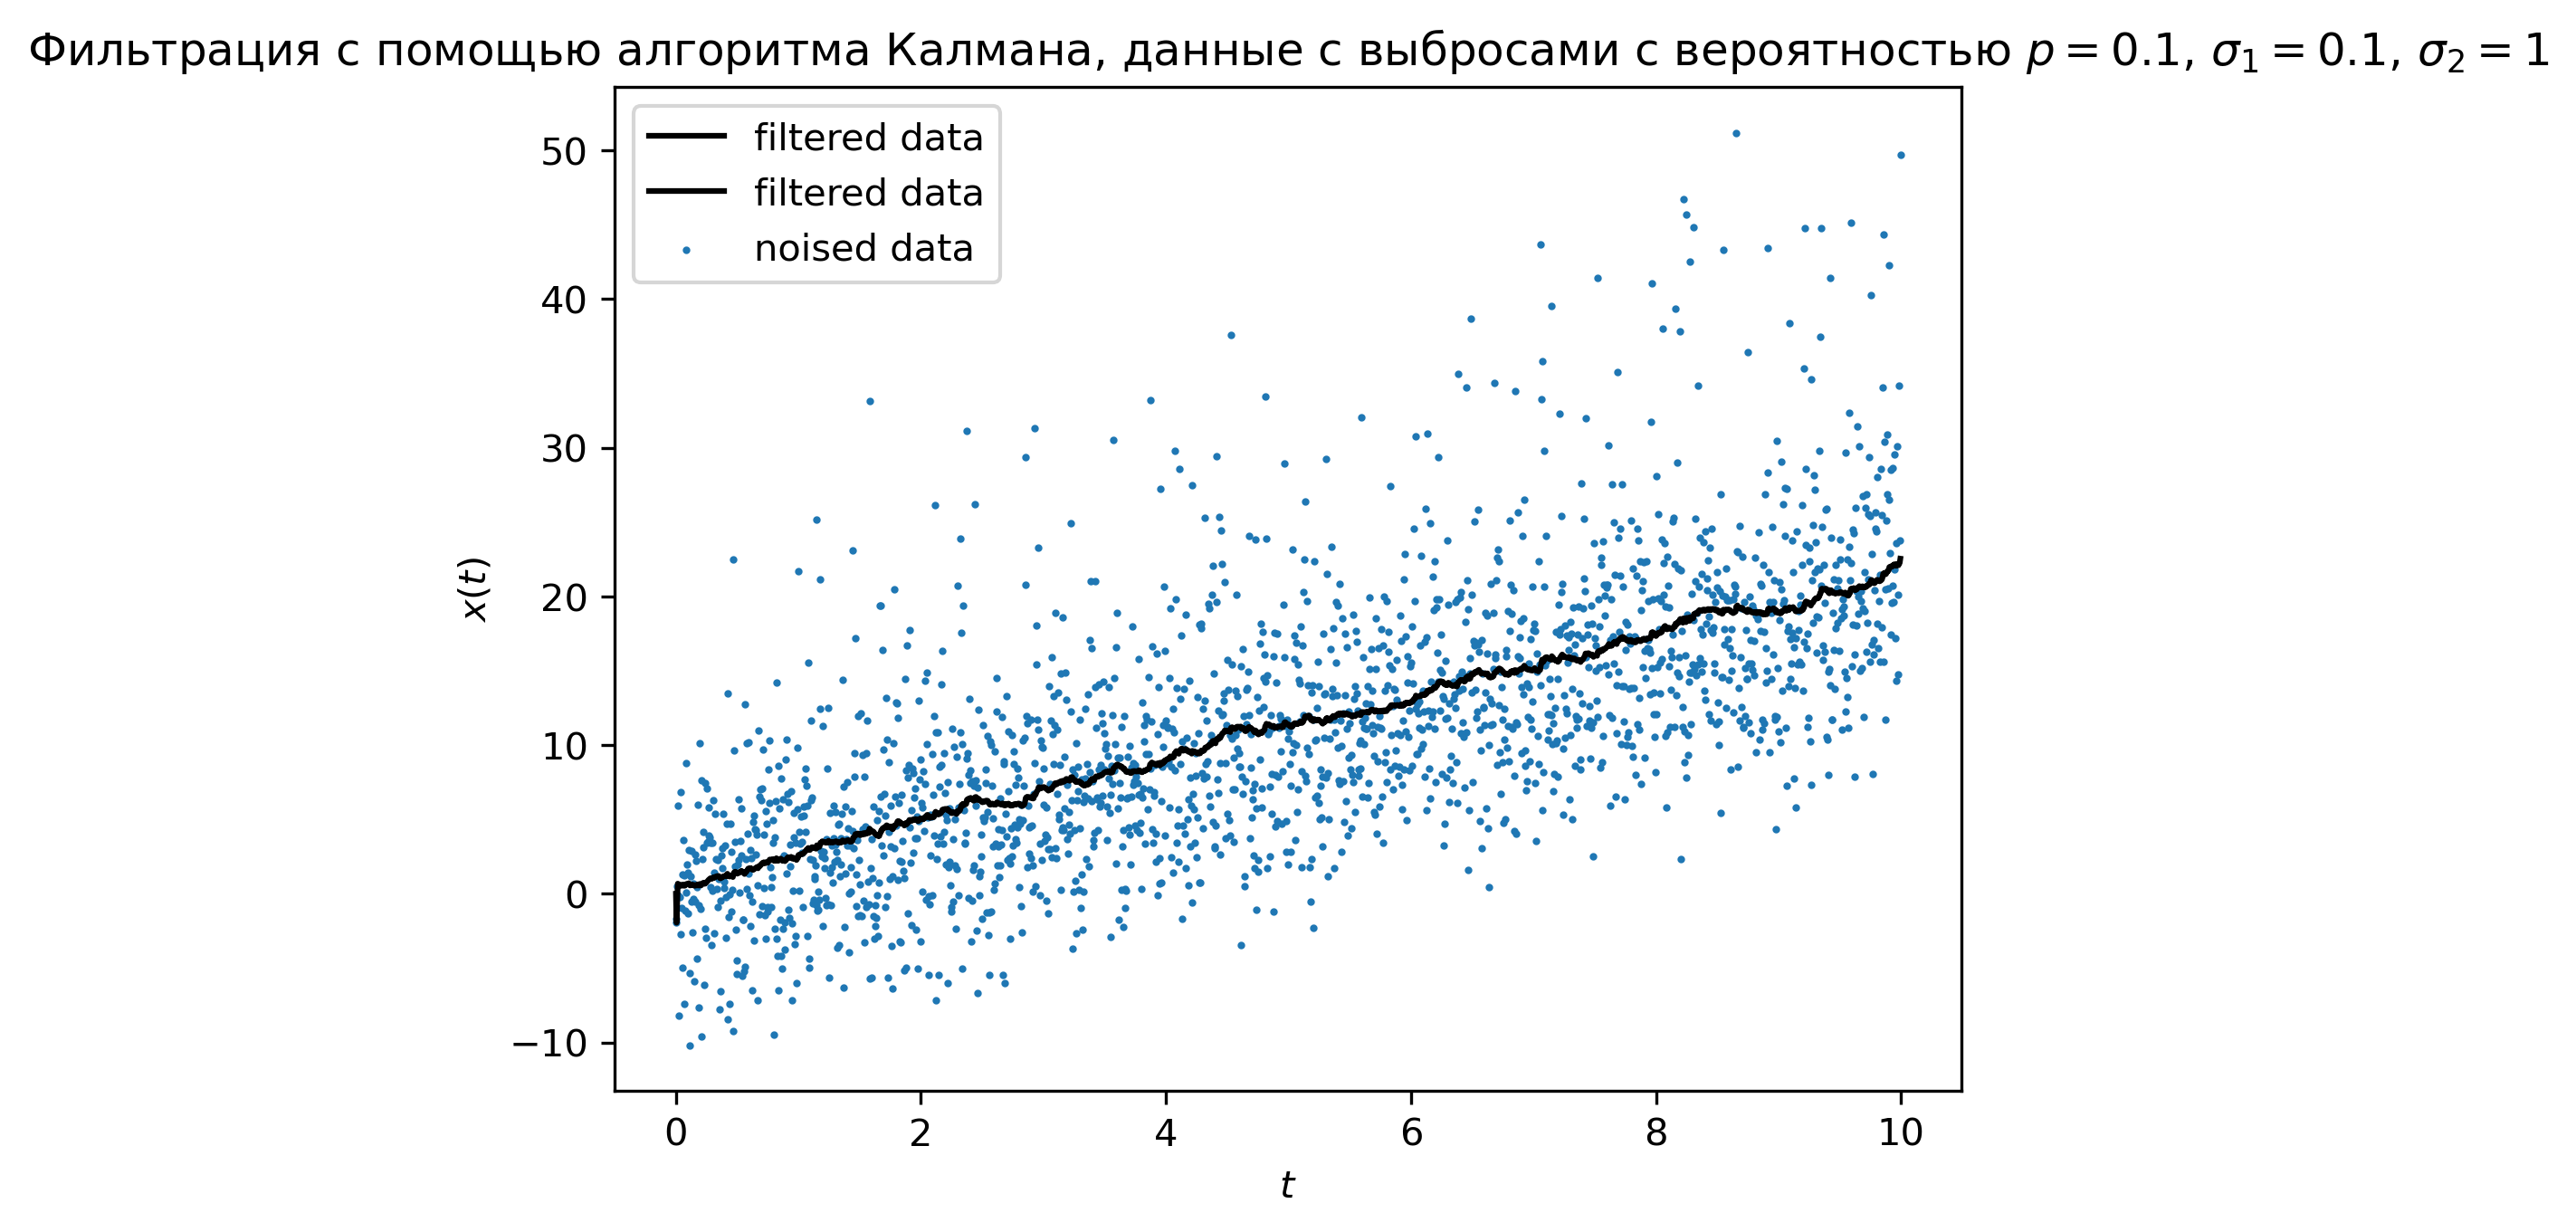

In [123]:
plt.figure(dpi=300)
plt.plot(t, x_opt_arr_outliers, 1, color='black', label=r'filtered data')
plt.scatter(t, z_with_outliers, 1, label=r'noised data')
plt.legend()
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.title(fr'Фильтрация с помощью алгоритма Калмана, данные с выбросами c вероятностью $p = {p}$, $\sigma_1 = {sigma_1}$, $\sigma_2 = {sigma_2}$')
plt.show()

[]

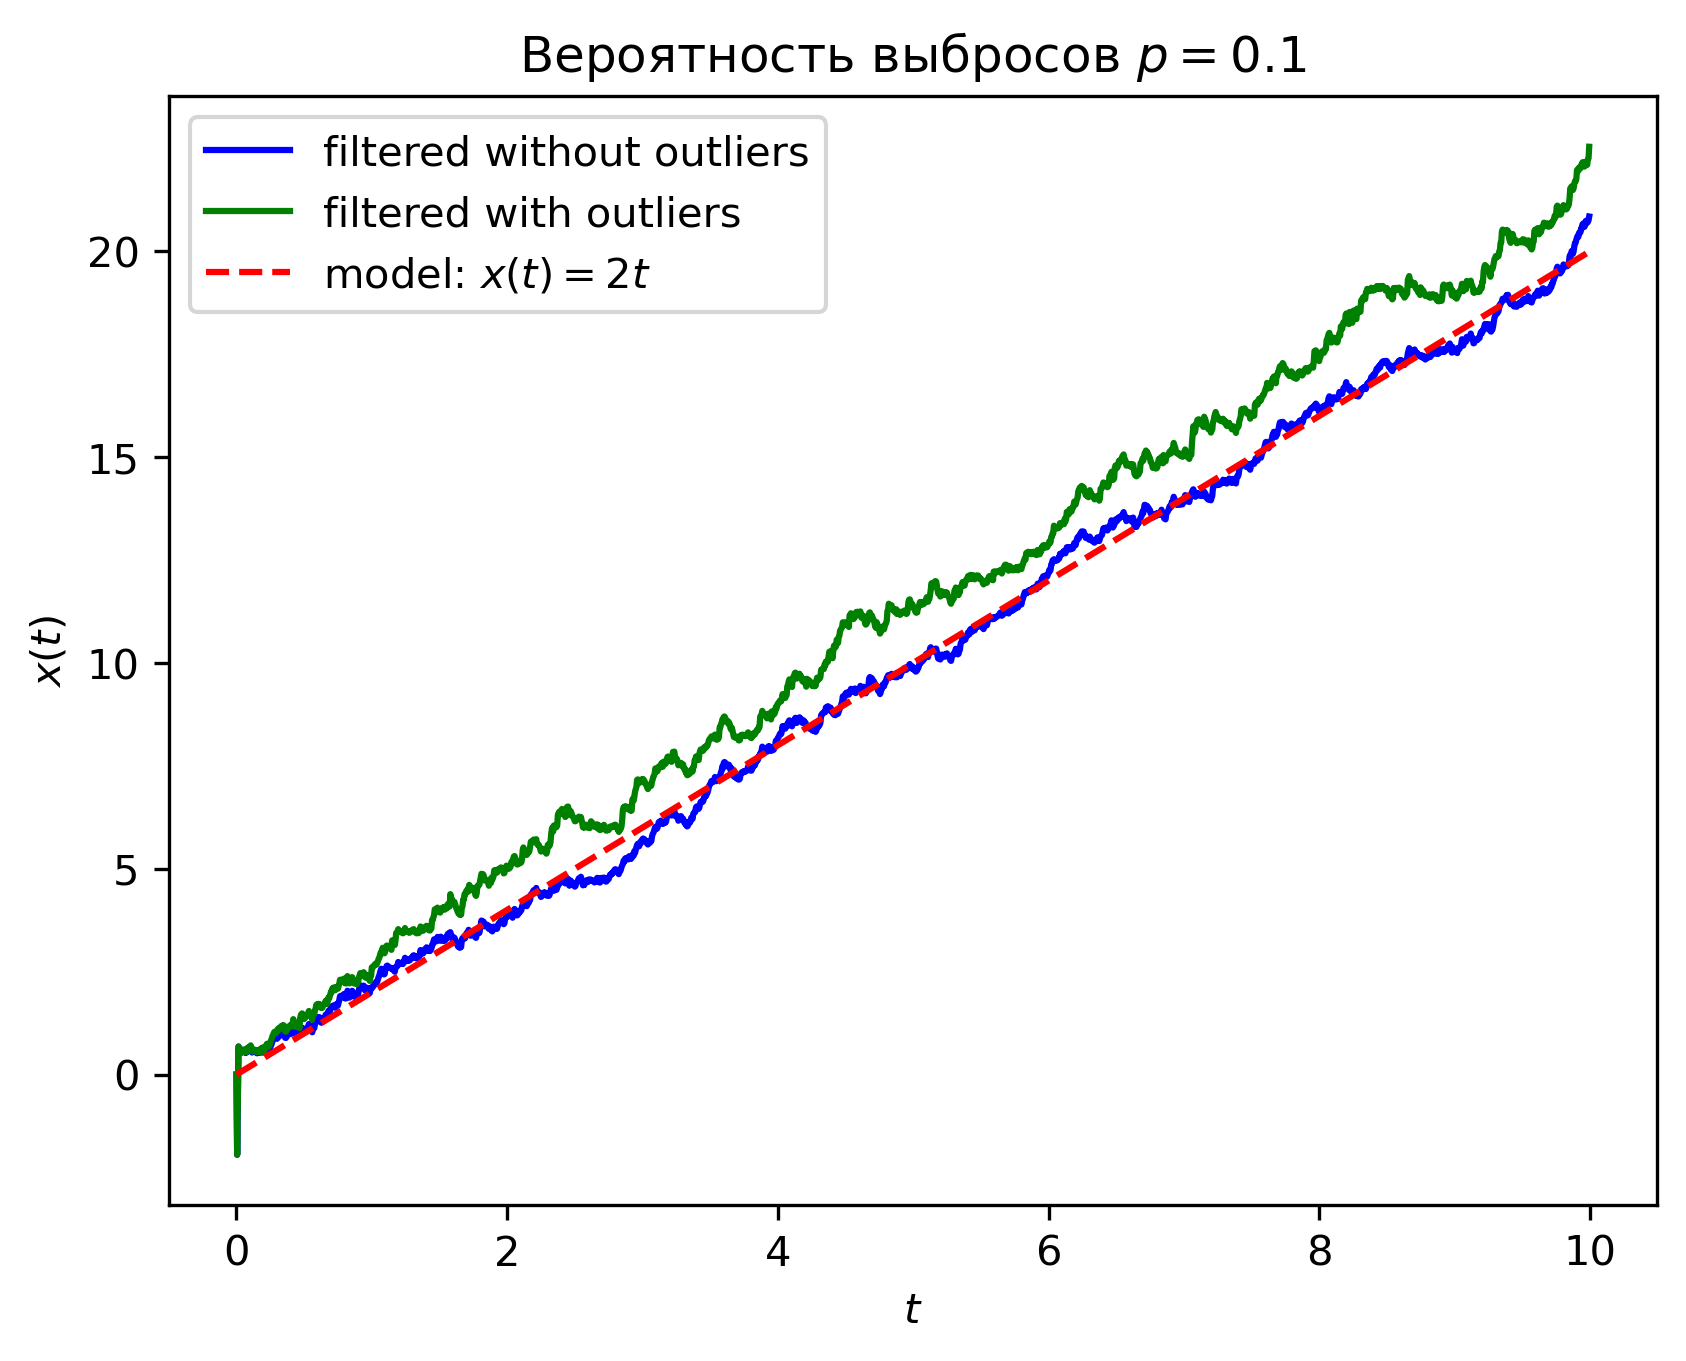

In [131]:
plt.figure(dpi=300)
plt.plot(t, x_opt_arr, '-b', label="filtered without outliers")
plt.plot(t, x_opt_arr_outliers, '-g', label="filtered with outliers")
plt.plot(t, 2*t, '--r', label=fr"model: $x(t) = 2t$")
plt.legend()
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.title(fr'Вероятность выбросов $p = {p}$')
plt.plot()